** How does screen time impact general mental wellness? **
Step 3: Bivariate EDA (Two Variables at a Time)
After univariate EDA, analyze relationships between two or more variables using:
Grouped summaries (e.g., df.groupby())
Cross-tabs (e.g., pd.crosstab())
Scatter plots, bar plots, boxplots, etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

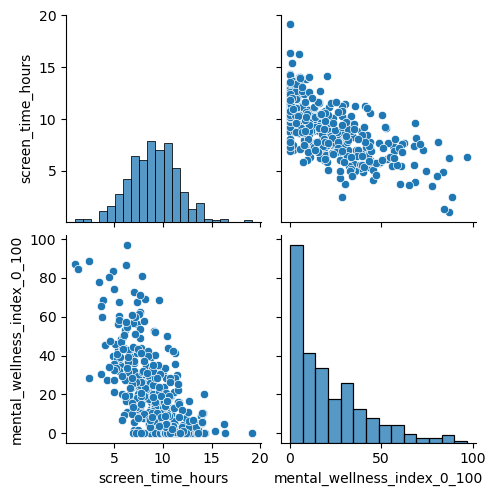

In [14]:
sns.pairplot(df[["screen_time_hours","mental_wellness_index_0_100"]])
plt.show()


In [2]:
df = pd.read_csv("cleaned_data.csv")
df = df.set_index("user_id")
df.head()


,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


Scatter box with and Without 0 in Mental wellnes 

In [23]:
sns.boxplot(data=df.head(50), y='screen_time_hours' , x='mental_wellness_index_0_100', legend= False)

<Axes: xlabel='screen_time_hours', ylabel='mental_wellness_index_0_100'>

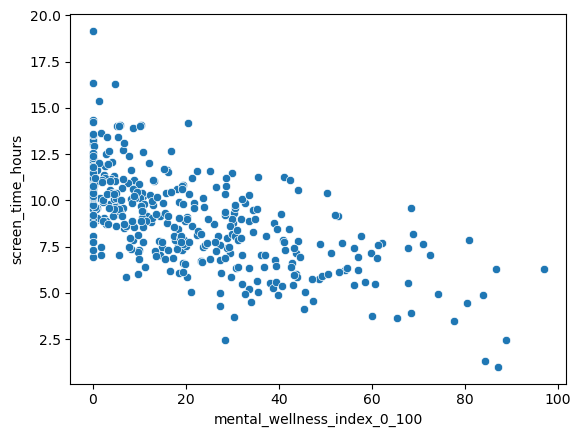

In [8]:
#scatterplot with 0 included in metnal wellness 
sns.scatterplot(data=df, x= 'mental_wellness_index_0_100' , y ='screen_time_hours')
plt.show()

In [10]:
crosstab_relsut = pd.crosstab(df
crosstab_relsut

screen_time_hours,1.00,1.32,2.44,3.49,3.64,3.69,3.76,3.93,4.10,4.30,4.47,4.48,4.56,4.87,4.89,4.96,5.00,5.03,5.04,5.07,5.18,5.28,5.35,5.41,5.44,5.50,5.52,5.57,5.59,5.65,5.74,5.84,5.85,5.87,5.90,5.98,6.00,6.02,6.03,6.09,6.10,6.15,6.20,6.21,6.26,6.28,6.31,6.32,6.34,6.37,6.40,6.42,6.43,6.55,6.61,6.67,6.71,6.76,6.77,6.82,6.85,6.86,6.89,6.90,6.92,6.95,6.97,7.02,7.04,7.05,7.06,7.13,7.16,7.17,7.18,7.22,7.24,7.26,7.30,7.32,7.34,7.35,7.38,7.40,7.41,7.42,7.43,7.46,7.47,7.48,7.49,7.51,7.52,7.57,7.58,7.63,7.64,7.67,7.71,7.72,7.73,7.75,7.76,7.77,7.80,7.82,7.83,7.85,7.86,7.88,7.94,7.95,7.98,7.99,8.05,8.06,8.07,8.08,8.12,8.14,8.16,8.18,8.23,8.29,8.32,8.38,8.45,8.47,8.53,8.55,8.56,8.57,8.60,8.62,8.64,8.70,8.71,8.72,8.73,8.75,8.76,8.80,8.81,8.86,8.87,8.88,8.89,8.93,8.97,8.98,8.99,9.01,9.02,9.04,9.05,9.07,9.11,9.13,9.14,9.17,9.20,9.23,9.24,9.26,9.31,9.32,9.37,9.39,9.43,9.47,9.51,9.52,9.53,9.55,9.57,9.58,9.59,9.61,9.62,9.65,9.66,9.69,9.72,9.73,9.75,9.78,9.80,9.81,9.82,9.83,9.86,9.87,9.88,9.93,9.94,9.98,10.02,10.03,10.04,10.05,10.07,10.09,10.12,10.13,10.14,10.17,10.18,10.19,10.20,10.23,10.24,10.25,10.26,10.27,10.30,10.31,10.33,10.34,10.36,10.37,10.38,10.39,10.40,10.42,10.44,10.47,10.48,10.54,10.57,10.60,10.63,10.64,10.68,10.70,10.75,10.79,10.82,10.84,10.89,10.95,10.97,11.02,11.04,11.05,11.06,11.09,11.10,11.12,11.13,11.14,11.15,11.16,11.19,11.20,11.21,11.22,11.23,11.27,11.28,11.30,11.38,11.49,11.54,11.55,11.58,11.61,11.64,11.65,11.67,11.71,11.75,11.79,11.81,11.85,11.94,11.96,12.02,12.03,12.05,12.06,12.18,12.19,12.27,12.39,12.51,12.55,12.56,12.63,12.67,12.69,12.73,12.92,13.05,13.08,13.22,13.29,13.40,13.44,13.49,13.51,13.59,13.66,13.90,14.00,14.02,14.07,14.09,14.18,14.22,14.35,15.38,16.29,16.36,19.17
mental_wellness_index_0_100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,1,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1
0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

for in the project meterial

# **How does screen time impact general mental wellness?**






In [24]:
rel_col = ["screen_time_hours","mental_wellness_index_0_100"]
df[rel_col].describe()

,screen_time_hours,mental_wellness_index_0_100
count,400.000000,400.000000
mean,9.024900,20.326750
std,2.491058,20.376793
min,1.000000,0.000000
25%,7.372500,3.675000
50%,9.090000,14.800000
75%,10.495000,30.650000
max,19.170000,97.000000



In a sample of 400 people, average screen time is 9 hours/day, while mental wellness scores average just 20 out of 100. A quarter of participants report zero wellness, and the data shows wide variation.
This suggests a possible link: more screen time may be associated with lower mental wellness. Further analysis could help confirm it.

## Median vs. Density in the Hexbin Plot



In [25]:
df[rel_col].median()

screen_time_hours               9.09
mental_wellness_index_0_100    14.80
dtype: float64

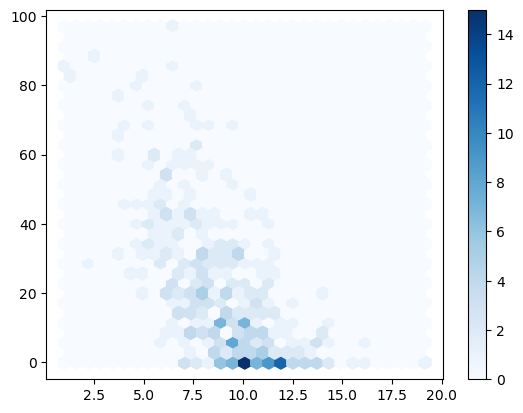

In [33]:
plt.hexbin(df["screen_time_hours"], df["mental_wellness_index_0_100"], gridsize=30, cmap='Blues')
plt.colorbar()
plt.show()

The median screen time is 9 hours, and the median mental wellness score is 10. In the hexbin plot, the densest region aligns closely with these values meaning most people fall near this combination.
This overlap suggests that low wellness scores are common even at typical screen time levels, reinforcing a possible negative trend between screen time and mental well-being.


## Correlation Confirms the Pattern



In [27]:
# Calculating the Pearson correlation coefficient
round(float(df["screen_time_hours"].corr(df["mental_wellness_index_0_100"], method="pearson")), 2)

-0.64

In [28]:
# Calculating the Spearman rank correlation 
round(float(df["screen_time_hours"].corr(df["mental_wellness_index_0_100"], method="spearman")), 2)

-0.65

Both Pearson (-0.64) and Spearman (-0.65) correlations show a strong negative relationship between screen time and mental wellness. This backs up what we saw in the hexbin plot: most people cluster around the median screen time (9 hrs) and low wellness scores (10).
In short, the more time spent on screens, the lower the reported mental wellness at least in this dataset.

## Scatter Plot + Histograms: Reinforcing the Trend




In [1]:
sns.jointplot(y=df["screen_time_hours"], x=df["mental_wellness_index_0_100"])
plt.show()

NameError: name 'sns' is not defined

The histograms confirm that most participants report high screen time and low wellness, reinforcing the negative correlation we saw earlier.
Together, these visuals and stats paint a consistent picture: more screen time tends to align with lower mental wellness in this dataset.


## Regression Line: Visual Proof of the Trend


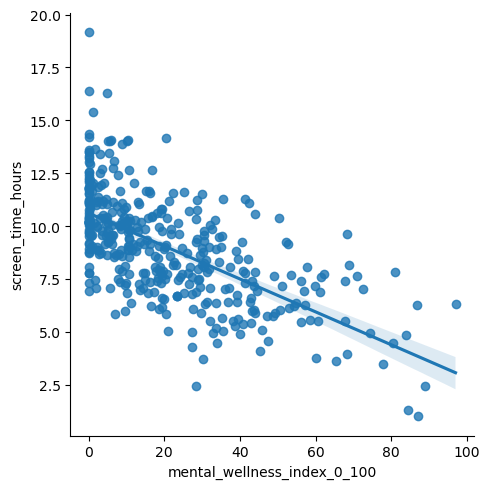

In [30]:
#lm plot 
sns.lmplot(data=df, y= "screen_time_hours", x= "mental_wellness_index_0_100")
plt.show()


The regression line clearly slopes downward, confirming a negative relationship between screen time and mental wellness. Most data points cluster around 9 hours of screen time and low wellness scores, echoing the median values and earlier plots.
The confidence interval adds weight: it shows that the downward trend is statistically consistent across the dataset.


## Removed Zero Wellness Scores





In [31]:
(df['mental_wellness_index_0_100'] == 0).sum()

np.int64(61)

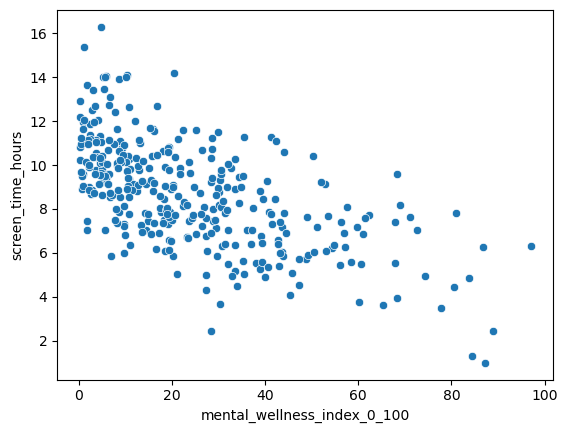

In [32]:
#scatterplot without 0 in ,menatal welness index 
df_new = df.drop(df[df['mental_wellness_index_0_100'] == 0].index)
sns.scatterplot(data=df_new, x= 'mental_wellness_index_0_100' , y ='screen_time_hours')
plt.show()

In the dataset, 61 entries had a mental wellness score of 0. While that could reflect genuine responses, it’s also possible that 0 was used as a placeholder—either for missing data or skipped questions. To avoid skewing the analysis, we created a version of the plot that excludes these zero values.
The updated scatterplot shows a clearer negative trend: as mental wellness scores increase, screen time tends to decrease. This helps us focus on more reliable data and strengthens the observed relationship.